In [550]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
# device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
#                                    not x.configuration().simulator and x.status().operational==True))
# print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2021-12-03 12:40:13,773: Credentials are already in use. The existing account in the session will be replaced.


In [458]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [859]:
def grovers_algorithm(k,d):
    n = 4
    grover_circuit = QuantumCircuit(n)
    grover_circuit = initialize_s(grover_circuit, [0,1])
   
    grover_circuit.cz(0,1) # Oracle

    # Diffusion operator (U_s)
    grover_circuit.h([0,1])
    grover_circuit.z([0,1])
    grover_circuit.cz(0,1)
    grover_circuit.h([0,1])
    
    
    for i in range(k):
        grover_circuit.cx(2,3)
#         grover_circuit.delay(d, qarg=2, unit = 'dt')
#         grover_circuit.delay(d, unit = 'dt')
        
#         grover_circuit.c(2)
#         grover_circuit.delay(d, unit = 'dt')
#         grover_circuit.barrier()
    
    return grover_circuit

In [848]:
grover_circuit = grovers_algorithm(2,1)
print(grover_circuit)
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

     ┌───┐                ┌───┐     ┌───┐         ┌───┐
q_0: ┤ H ├───────■────────┤ H ├─────┤ Z ├───────■─┤ H ├
     ├───┤       │        ├───┤     ├───┤       │ ├───┤
q_1: ┤ H ├───────■────────┤ H ├─────┤ Z ├───────■─┤ H ├
     └───┘┌──────────────┐└───┘┌────┴───┴─────┐   └───┘
q_2: ──■──┤ Delay(1[dt]) ├──■──┤ Delay(1[dt]) ├────────
     ┌─┴─┐└──────────────┘┌─┴─┐└──────────────┘        
q_3: ┤ X ├────────────────┤ X ├────────────────────────
     └───┘                └───┘                        


<IPython.core.display.Math object>

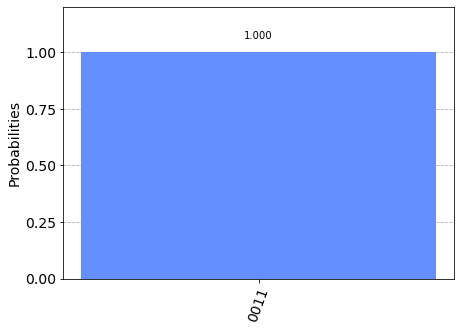

In [849]:
grover_circuit.measure_all()
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [850]:
device = provider.get_backend('ibmq_lima')
print("Running on device: ", device)
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3, scheduling_method='alap')

Running on device:  ibmq_lima


In [726]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue

job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


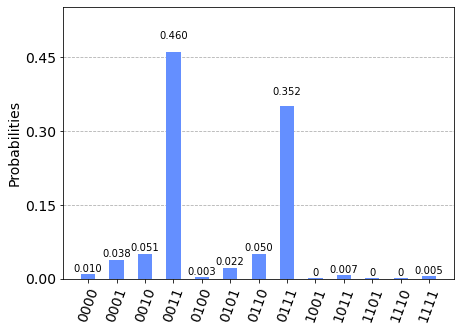

In [727]:

# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

# k=100
# prob = int(answer['0011'])/1000
# print(prob)
# f = open("test.txt", "w")
# f.write(str(k))
# f.write(str(", "))
# f.write(str(prob))
# f.close()

In [851]:
print(transpiled_grover_circuit)

               ┌─────────────────┐       ┌──────────────┐     »
      q_2 -> 0 ┤ Delay(2238[dt]) ├───■───┤ Delay(1[dt]) ├──■──»
               ├─────────────────┤ ┌─┴─┐ ├──────────────┤┌─┴─┐»
      q_3 -> 1 ┤ Delay(2238[dt]) ├─┤ X ├─┤ Delay(1[dt]) ├┤ X ├»
               ├─────────────────┴┐└───┘ └──────────────┘└───┘»
ancilla_0 -> 2 ┤ Delay(29072[dt]) ├───────────────────────────»
               └───┬──────────┬───┘┌────┐                ┌───┐»
      q_0 -> 3 ────┤ Rz(-π/2) ├────┤ √X ├────────────────┤ X ├»
                   └┬────────┬┘    ├────┤  ┌─────────┐   └─┬─┘»
      q_1 -> 4 ─────┤ Rz(-π) ├─────┤ √X ├──┤ Rz(π/2) ├─────■──»
                    └────────┘     └────┘  └─────────┘        »
       meas: 4/═══════════════════════════════════════════════»
                                                              »
«                ┌──────────────┐                                              »
«      q_2 -> 0 ─┤ Delay(1[dt]) ├──────────────────────────────────────────────»
«     

QiskitBackendNotFoundError: 'No backend matches the criteria'

In [693]:
provider = IBMQ.get_provider(hub='ibm-q')
real_device = provider.get_backend('ibmq_lima')
properties = real_device.properties()


In [680]:
backend = provider.get_backend('ibmq_lima')
from qiskit.transpiler import CouplingMap
num_qubits = backend.configuration().n_qubits 
qubit_layout = CouplingMap( getattr(backend.configuration(), 'coupling_map', None) ).reduce([i for i in range(num_qubits)])
print('\n qubit_layout: \n', qubit_layout, "\n backend = ", backend) 
# qubit_layout.draw()  #This will print out the graph at the bottom 


 qubit_layout: 
 [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]] 
 backend =  ibmq_lima


In [694]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = provider.get_backend('ibmq_lima')
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [760]:
k_values = [0,2,10,20,30,40,50,60,70,100,200,300,500,1000,2000,5000]
# k_values = [0,1,10,20,30,40,50,60,70,100,200]
d = 1

f = open("Z-Kd1.txt", "w")
for i in range(len(k_values)):
    grover_circuit = grovers_algorithm(k_values[i],d)
    grover_circuit.measure_all()
    device = provider.get_backend('ibmq_lima')
    print("Running on device: ", device)
    from qiskit.tools.monitor import job_monitor
    transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3, scheduling_method='alap')
    job = device.run(transpiled_grover_circuit)
    job_monitor(job, interval=2)
    
    results = job.result()
    answer = results.get_counts(grover_circuit)
    plot_histogram(answer)

#     prob = int(answer['0011'])/1000
    prob = int(answer['0011'])/1000 
    print(k_values[i], prob)
    f.write(str(k_values[i]))
    f.write(str(", "))
    f.write(str(prob))
    f.write(str("\n"))
f.close()    
    

Running on device:  ibmq_lima
Job Status: job has successfully run
0 0.89
Running on device:  ibmq_lima
Job Status: job has successfully run
2 0.876
Running on device:  ibmq_lima
Job Status: job has successfully run
10 0.854
Running on device:  ibmq_lima
Job Status: job has successfully run
20 0.879
Running on device:  ibmq_lima
Job Status: job has successfully run
30 0.847
Running on device:  ibmq_lima
Job Status: job has successfully run
40 0.87
Running on device:  ibmq_lima
Job Status: job has successfully run
50 0.872
Running on device:  ibmq_lima
Job Status: job has successfully run
60 0.852
Running on device:  ibmq_lima
Job Status: job has successfully run
70 0.876
Running on device:  ibmq_lima
Job Status: job has successfully run
100 0.845
Running on device:  ibmq_lima
Job Status: job has successfully run
200 0.866
Running on device:  ibmq_lima
Job Status: job has successfully run
300 0.864
Running on device:  ibmq_lima
Job Status: job has successfully run
500 0.86
Running on de

In [721]:
print(transpiled_grover_circuit)

         ┌──────────────────┐   ┌────────┐   ┌────┐  ┌─────────┐        »
q_0 -> 0 ┤ Delay(12608[dt]) ├───┤ Rz(-π) ├───┤ √X ├──┤ Rz(π/2) ├─────■──»
         ├──────────────────┤  ┌┴────────┴┐  ├────┤  └─────────┘   ┌─┴─┐»
q_1 -> 1 ┤ Delay(12608[dt]) ├──┤ Rz(-π/2) ├──┤ √X ├────────────────┤ X ├»
         ├──────────────────┤  └──────────┘  └────┘                └───┘»
q_2 -> 2 ┤ Delay(16100[dt]) ├───────────────────────────────────────────»
         ├──────────────────┤                                           »
q_3 -> 3 ┤ Delay(16100[dt]) ├───────────────────────────────────────────»
         └──────┬───┬───────┘┌──────────────┐┌───┐ ┌──────────────┐┌───┐»
q_4 -> 4 ───────┤ X ├────────┤ Delay(1[dt]) ├┤ X ├─┤ Delay(1[dt]) ├┤ X ├»
                └───┘        └──────────────┘└───┘ └──────────────┘└───┘»
 meas: 5/═══════════════════════════════════════════════════════════════»
                                                                        »
«               ┌────┐      ┌─────────

ModuleNotFoundError: No module named 'pygraphviz'

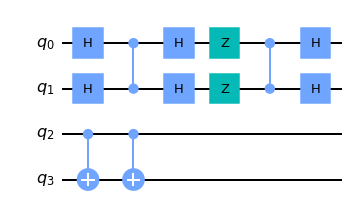

In [865]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.test.mock import FakeVigo
backend = provider.get_backend('ibmq_lima')

gc = grovers_algorithm(2,1)
# gc.measure_all()
device = provider.get_backend('ibmq_lima')
gc.draw(output='mpl')


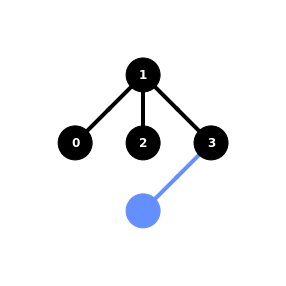

In [866]:
# new_circ_lv0 = transpile(gc, backend=backend, optimization_level=0, scheduling_method='alap')
# plot_circuit_layout(new_circ_lv0, backend)

new_circ_lv0 = transpile(gc, backend=backend, optimization_level=0, scheduling_method='alap')
plot_circuit_layout(new_circ_lv0, backend)

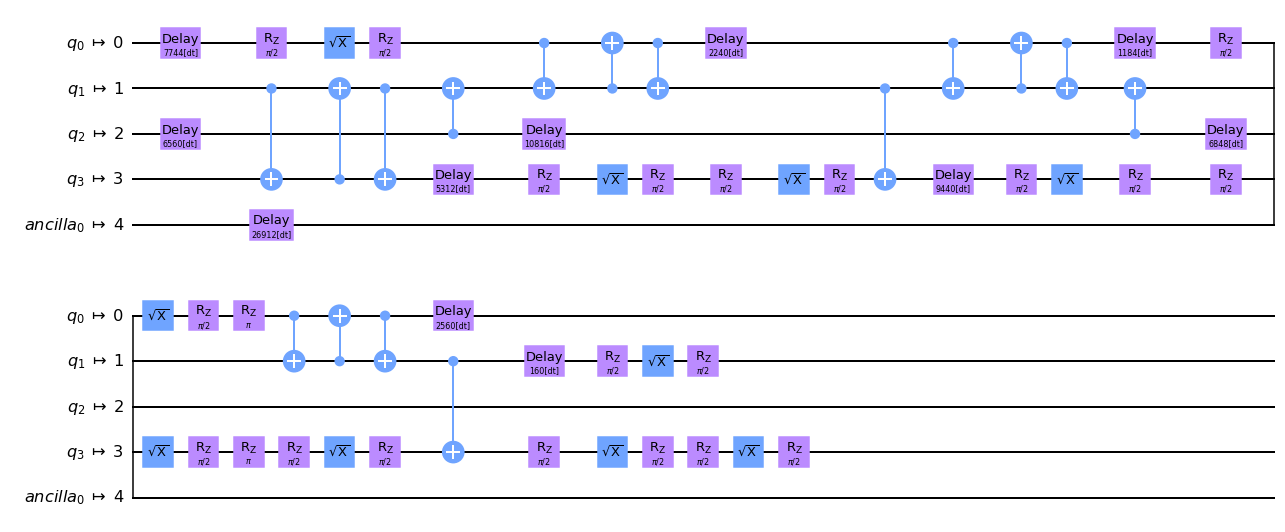

In [867]:
new_circ_lv0.draw('mpl')

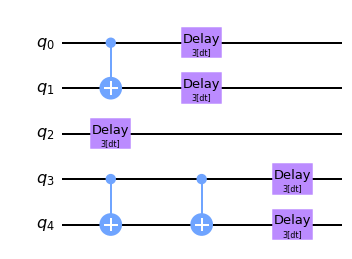

In [885]:
ghz = QuantumCircuit(5)
# ghz.x(0)
# ghz.ccx(0,1,2)
ghz.cx(0,1)
ghz.cx(3,4)
ghz.cx(3,4)
ghz.delay(3,unit = 'dt')
# ghz.cx(3,4)

# ghz.measure_all()
ghz.draw(output='mpl')


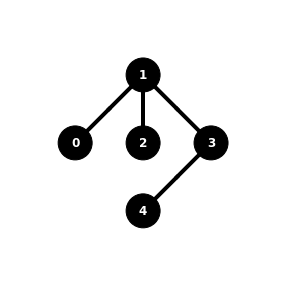

In [886]:
# qplot = transpile(ghz, backend=backend, optimization_level=1, scheduling_method='alap')
qplot = transpile(ghz, backend=backend, scheduling_method='alap')
plot_circuit_layout(qplot, backend)

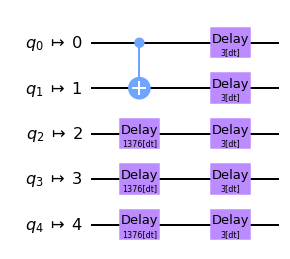

In [887]:
qplot.draw(output='mpl')